## Building the Models 

#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [88]:
df=pd.read_csv('data/Amazon Sales data.csv')

In [89]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In our dataset, as observed during the exploratory data analysis (EDA) phase, we found no duplicate values. While there are some outliers present, it's important to note that these outliers contribute to our calculations, therefore we have opted not to remove them.

### First, we are assessing which algorithms perform well with this dataset.

### Using Pycaret library
PyCaret is an open-source, low-code machine learning library in Python that allows users to quickly and easily build, compare, and deploy machine learning models on structured and tabular data. It is designed to streamline the machine learning workflow and reduce the amount of code needed to build a model, while still providing users with a high degree of flexibility and control over the modeling process.

PyCaret provides a variety of pre-processing methods, feature engineering techniques, and model selection strategies that can be easily applied to a dataset with just a few lines of code. It also includes a range of tools for model interpretation, such as feature importance plots and SHAP value plots.

Some of the key features of PyCaret include:

- Preprocessing and feature engineering functions
- Automatic model selection and hyperparameter tuning
- Interpretation tools for model results
- Support for a wide range of machine learning algorithms
- Deployment of models to production

In [90]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [91]:
df["Order Date"]=df["Order Date"].astype("datetime64[ns]")
df['Ship Date']=df['Ship Date'].astype("datetime64[ns]")

# Create new columns for months, years, day, and year-month
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Date'] = df['Order Date'].dt.day

In [92]:
# We are droping following columns - 'Order ID','Total Revenue ', 'Total Cost'
# 'Total Revenue ' and  'Total Cost' are not independent features
# we are lable encoding the Object columns.

In [93]:
df1=df.drop(['Order ID','Ship Date'],axis=1)
df.drop(['Order ID','Total Revenue', 'Total Cost','Ship Date'],axis=1,inplace=True)

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
object_col=df.select_dtypes(include="object")
object_col.head()

,Region,Country,Item Type,Sales Channel,Order Priority
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H
1,Central America and the Caribbean,Grenada,Cereal,Online,C
2,Europe,Russia,Office Supplies,Offline,L
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L


In [54]:
for i in object_col:
    df[i]=le.fit_transform(df[i])

    # Print label mapping for the column
    print(f"Label mapping for column '{i}':")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)


Label mapping for column 'Region':
{'Asia': 0, 'Australia and Oceania': 1, 'Central America and the Caribbean': 2, 'Europe': 3, 'Middle East and North Africa': 4, 'North America': 5, 'Sub-Saharan Africa': 6}
Label mapping for column 'Country':
{'Albania': 0, 'Angola': 1, 'Australia': 2, 'Austria': 3, 'Azerbaijan': 4, 'Bangladesh': 5, 'Belize': 6, 'Brunei': 7, 'Bulgaria': 8, 'Burkina Faso': 9, 'Cameroon': 10, 'Cape Verde': 11, 'Comoros': 12, 'Costa Rica': 13, "Cote d'Ivoire": 14, 'Democratic Republic of the Congo': 15, 'Djibouti': 16, 'East Timor': 17, 'Federated States of Micronesia': 18, 'Fiji': 19, 'France': 20, 'Gabon': 21, 'Grenada': 22, 'Haiti': 23, 'Honduras': 24, 'Iceland': 25, 'Iran': 26, 'Kenya': 27, 'Kiribati': 28, 'Kuwait': 29, 'Kyrgyzstan': 30, 'Laos': 31, 'Lebanon': 32, 'Lesotho': 33, 'Libya': 34, 'Lithuania': 35, 'Macedonia': 36, 'Madagascar': 37, 'Malaysia': 38, 'Mali': 39, 'Mauritania': 40, 'Mexico': 41, 'Moldova ': 42, 'Monaco': 43, 'Mongolia': 44, 'Mozambique': 45, 'M

In [55]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Profit,Order Month,Order Year
0,1,73,0,0,1,28,9925,255.28,159.42,951410.50,5,2010
1,2,22,2,1,0,22,2804,205.70,117.11,248406.36,8,2012
2,3,55,8,0,2,2,1779,651.21,524.96,224598.75,5,2014
3,6,59,5,1,0,20,8102,9.33,6.92,19525.82,6,2014
4,6,56,8,0,2,1,5062,651.21,524.96,639077.50,2,2013


In [56]:
from pycaret.regression import *

In [57]:

# Set target value
reg = setup(data=df,target='Total Profit')

,Description,Value
0,Session id,7602
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 12)"
4,Transformed data shape,"(100, 12)"
5,Transformed train set shape,"(70, 12)"
6,Transformed test set shape,"(30, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [60]:
# Comparing multiple models 
data_df_models=compare_models()
data_df_models

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:07:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,70989.6725,8560953117.5301,86362.5687,0.9163,0.6390,1.2098,0.1690
et,Extra Trees Regressor,91523.5580,18509378680.8605,121289.8814,0.8793,0.6657,1.3156,0.2230
rf,Random Forest Regressor,117005.8287,22911656557.7629,143925.9958,0.8443,0.8648,2.4891,0.2610
ada,AdaBoost Regressor,123565.9126,25748565094.3609,153221.9295,0.8124,0.8801,2.4821,0.2480
huber,Huber Regressor,125856.4678,31329602511.1211,167321.6429,0.7653,0.9971,7.3217,0.0760
br,Bayesian Ridge,131733.9212,33228390581.1379,172331.3389,0.7388,1.0474,8.2508,0.0610
dt,Decision Tree Regressor,137195.7612,34447330359.2706,169173.5047,0.7221,0.7751,1.0659,0.0480
en,Elastic Net,140065.2401,34296340522.4941,177387.8004,0.7195,1.1515,8.5338,0.0560
lr,Linear Regression,145010.0323,35653781489.2524,181882.5383,0.7192,1.1398,8.5381,0.0540
lasso,Lasso Regression,145009.5313,35653603825.0627,181882.0793,0.7192,1.1398,8.5381,0.0480


GradientBoostingRegressor(random_state=7602)

In [61]:
# Using Lasso Least Angle Regression algorithm to train model 
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,68296.5049,10252879789.5992,101256.5049,0.9624,1.2189,3.7122
1,78242.8753,7170409446.9962,84678.2702,0.9543,0.1703,0.1229
2,38390.6999,2541147575.0126,50409.7964,0.9830,0.1904,0.1686
3,55386.1190,4757702876.1304,68976.1037,0.9145,0.2973,0.2587
4,123520.3248,22899124350.4072,151324.5662,0.7883,0.5721,0.6866
5,70205.4888,6938565461.1821,83298.0520,0.9803,0.7020,0.8124
6,49901.9664,3399925738.3987,58308.8822,0.9862,1.5791,4.4041
7,99618.2420,13035420740.0802,114172.7671,0.9544,0.6341,0.7245
8,94387.6866,13339616111.0530,115497.2559,0.6660,0.7391,0.9504


In [62]:
# Tuning the model for better performance 
tuned_gbr_model = tune_model(gbr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,158129.6190,40043116643.6990,200107.7626,0.8532,1.5407,8.0090
1,245887.9568,90869485673.6536,301445.6596,0.4206,0.3987,0.3645
2,110738.4957,24039499000.0018,155046.7639,0.8388,0.3869,0.3851
3,89961.3048,14490106436.7607,120374.8580,0.7395,0.5488,0.6125
4,93414.3501,13418768103.2008,115839.4065,0.8760,0.8935,1.3549
5,126958.2004,23738540631.4703,154073.1665,0.9327,0.9722,1.7538
6,88616.8169,10219580510.8909,101091.9409,0.9585,1.6243,4.6240
7,164929.9293,46223517109.7775,214996.5514,0.8382,0.8861,1.4100
8,132426.2419,23252115985.3164,152486.4453,0.4179,0.9033,1.3963


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


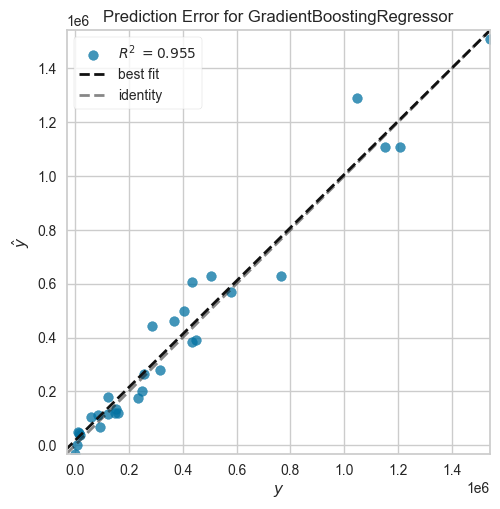

In [63]:

# Plot prediction error plot for Lasso Least Angle Regression based trained model 
plot_model(tuned_gbr_model, plot="error")

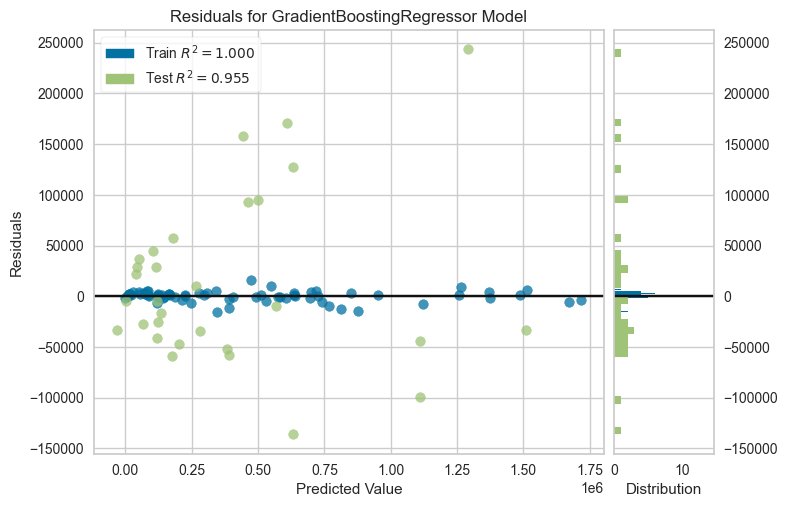

In [64]:
# Plot residuals for Lasso Least Angle Regression based trained model 
plot_model(tuned_gbr_model)

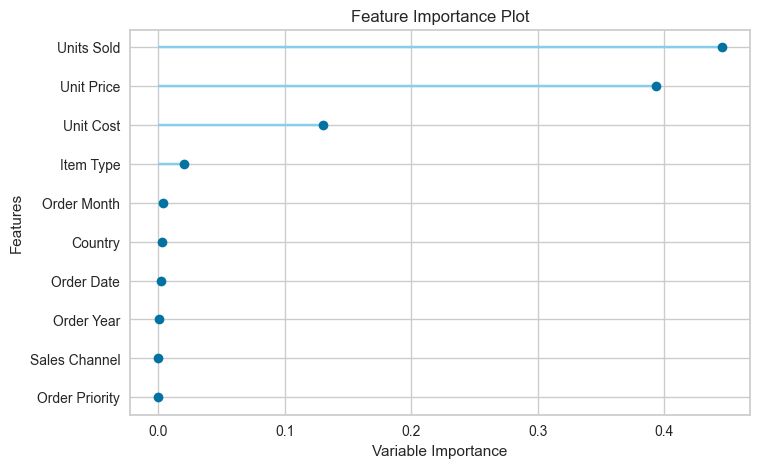

In [76]:

# Plot feature importance plot 
plot_model(tuned_gbr_model,plot='feature')

In [65]:
predict_model(tuned_gbr_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,61384.8459,6839817036.0506,82703.1864,0.9554,0.7173,1.0823


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Order Month,Order Year,Total Profit,prediction_label
81,4,32,3,1,2,18,7884,109.279999,35.840000,9,2012,5.790009e+05,5.692956e+05
47,3,69,9,1,3,23,273,81.730003,56.669998,12,2010,6.841380e+03,1.934532e+03
21,3,52,0,1,1,31,1273,255.279999,159.419998,7,2015,1.220298e+05,1.791526e+05
60,1,2,2,0,1,9,682,205.699997,117.110001,6,2013,6.041838e+04,1.052766e+05
53,6,62,8,0,3,26,3457,651.210022,524.960022,11,2011,4.364462e+05,6.073209e+05
92,4,4,8,1,3,13,2021,651.210022,524.960022,6,2012,2.551512e+05,2.654676e+05
16,0,68,4,0,3,19,6952,437.200012,263.329987,11,2016,1.208744e+06,1.109690e+06
71,4,34,5,1,2,14,673,9.330000,6.920000,8,2015,1.621930e+03,-3.131266e+04
96,0,38,5,0,2,11,6267,9.330000,6.920000,11,2011,1.510347e+04,4.425077e+04
44,0,46,3,1,1,14,5930,109.279999,35.840000,11,2015,4.354992e+05,3.829637e+05


In [66]:
 from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Preprocessing
X = df.drop('Total Profit', axis=1)
y = df['Total Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model creation
model = GradientBoostingRegressor()

# Model training
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 54887.197147198436


In [68]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2 Score:", r2)


r2 Score: 0.9819795635572242


In [75]:
import pickle


# Save the model to a file
with open('GradientBoostingRegresser.pkl', 'wb') as f:
    pickle.dump(model, f)


In [80]:
pd.DataFrame({'Original':y_test ,'Predicted':y_pred})

,Original,Predicted
83,225246.90,2.741268e+05
53,436446.25,4.266247e+05
70,632512.50,7.793476e+05
45,85223.58,7.386084e+04
44,435499.20,4.304920e+05
39,503358.75,6.635699e+05
22,122686.50,1.501800e+05
80,747939.49,7.718991e+05
10,7828.12,2.747612e+04
0,951410.50,8.543040e+05


In [69]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Create Grid Search
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE with tuned hyperparameters:", rmse)

# Calculate R-squared
r2 = best_model.score(X_test_scaled, y_test)
print("R-squared with tuned hyperparameters:", r2)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}
RMSE with tuned hyperparameters: 77603.5993331473
R-squared with tuned hyperparameters: 0.9639764153183353


In [95]:
for i in object_col:
    df1[i]=le.fit_transform(df1[i])

    # Print label mapping for the column
    print(f"Label mapping for column '{i}':")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)


Label mapping for column 'Region':
{'Asia': 0, 'Australia and Oceania': 1, 'Central America and the Caribbean': 2, 'Europe': 3, 'Middle East and North Africa': 4, 'North America': 5, 'Sub-Saharan Africa': 6}
Label mapping for column 'Country':
{'Albania': 0, 'Angola': 1, 'Australia': 2, 'Austria': 3, 'Azerbaijan': 4, 'Bangladesh': 5, 'Belize': 6, 'Brunei': 7, 'Bulgaria': 8, 'Burkina Faso': 9, 'Cameroon': 10, 'Cape Verde': 11, 'Comoros': 12, 'Costa Rica': 13, "Cote d'Ivoire": 14, 'Democratic Republic of the Congo': 15, 'Djibouti': 16, 'East Timor': 17, 'Federated States of Micronesia': 18, 'Fiji': 19, 'France': 20, 'Gabon': 21, 'Grenada': 22, 'Haiti': 23, 'Honduras': 24, 'Iceland': 25, 'Iran': 26, 'Kenya': 27, 'Kiribati': 28, 'Kuwait': 29, 'Kyrgyzstan': 30, 'Laos': 31, 'Lebanon': 32, 'Lesotho': 33, 'Libya': 34, 'Lithuania': 35, 'Macedonia': 36, 'Madagascar': 37, 'Malaysia': 38, 'Mali': 39, 'Mauritania': 40, 'Mexico': 41, 'Moldova ': 42, 'Monaco': 43, 'Mongolia': 44, 'Mozambique': 45, 'M

In [96]:
# Set target value
reg = setup(data=df1,target='Total Profit')
# Comparing multiple models 
df1_models=compare_models()
df1_models

,Description,Value
0,Session id,4380
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 14)"
4,Transformed data shape,"(100, 14)"
5,Transformed train set shape,"(70, 14)"
6,Transformed test set shape,"(30, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0460,0.0048,0.0638,1.0000,0.0000,0.0000,5.3110
ridge,Ridge Regression,0.0459,0.0047,0.0637,1.0000,0.0000,0.0000,0.1320
lar,Least Angle Regression,0.0460,0.0048,0.0638,1.0000,0.0000,0.0000,0.1020
llar,Lasso Least Angle Regression,0.0369,0.0041,0.0584,1.0000,0.0000,0.0000,0.2070
br,Bayesian Ridge,0.0460,0.0048,0.0638,1.0000,0.0000,0.0000,0.0980
par,Passive Aggressive Regressor,198.3969,129858.5462,252.6703,1.0000,0.0014,0.0009,0.1250
huber,Huber Regressor,0.0602,0.0099,0.0811,1.0000,0.0000,0.0000,0.1920
en,Elastic Net,1805.4602,7222080.9056,2316.9269,0.9999,0.1353,0.1664,0.1510
lasso,Lasso Regression,2089.7603,9824174.4271,2642.8767,0.9998,0.1466,0.1868,0.1420
et,Extra Trees Regressor,68256.4303,12581493964.0205,91661.7587,0.9137,0.3791,0.4086,0.5700


LinearRegression(n_jobs=-1)

In [97]:
llar_model=create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0176,0.0004,0.0205,1.0000,0.0000,0.0000
1,0.0595,0.0087,0.0934,1.0000,0.0000,0.0000
2,0.0397,0.0057,0.0752,1.0000,0.0000,0.0000
3,0.0323,0.0017,0.0410,1.0000,0.0000,0.0000
4,0.0413,0.0062,0.0786,1.0000,0.0000,0.0000
5,0.0231,0.0010,0.0310,1.0000,0.0000,0.0000
6,0.0305,0.0024,0.0489,1.0000,0.0000,0.0000
7,0.0416,0.0061,0.0779,1.0000,0.0000,0.0000
8,0.0606,0.0079,0.0889,1.0000,0.0000,0.0000


In [98]:
tuned_llar_model=tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0176,0.0004,0.0206,1.0000,0.0000,0.0000
1,0.0601,0.0088,0.0938,1.0000,0.0000,0.0000
2,0.0397,0.0057,0.0753,1.0000,0.0000,0.0000
3,0.0323,0.0017,0.0410,1.0000,0.0000,0.0000
4,0.0412,0.0062,0.0786,1.0000,0.0000,0.0000
5,0.0230,0.0010,0.0308,1.0000,0.0000,0.0000
6,0.0306,0.0024,0.0490,1.0000,0.0000,0.0000
7,0.0416,0.0061,0.0778,1.0000,0.0000,0.0000
8,0.0606,0.0079,0.0889,1.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


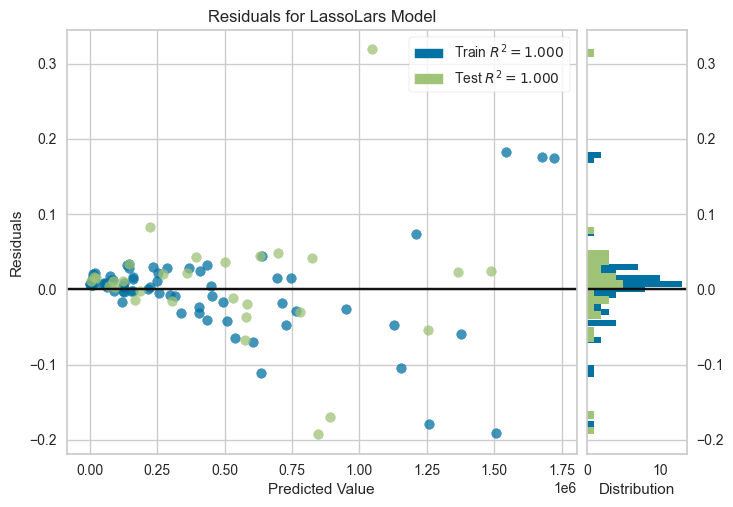

In [99]:
plot_model(tuned_llar_model)

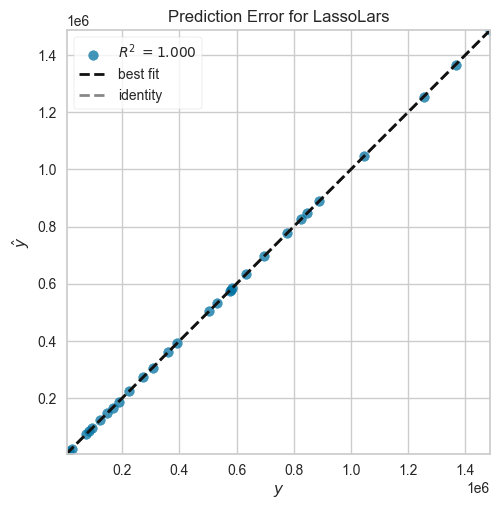

In [100]:
plot_model(tuned_llar_model,plot="error")

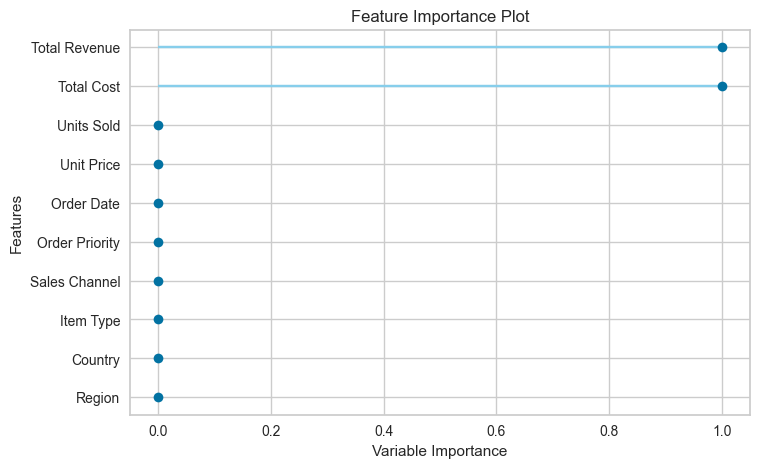

In [101]:
plot_model(tuned_llar_model,plot="feature")

In [104]:
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0475,0.0066,0.0813,1.0000,0.0000,0.0000


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Month,Order Year,Total Profit,prediction_label
2,3,55,8,0,2,2,1779,651.210022,524.960022,1.158503e+06,9.339038e+05,5,2014,2.245988e+05,2.245988e+05
52,4,60,2,1,3,25,4063,205.699997,117.110001,8.357591e+05,4.758179e+05,3,2013,3.599412e+05,3.599412e+05
97,6,62,11,0,0,1,1485,154.059998,90.930000,2.287791e+05,1.350310e+05,6,2016,9.374805e+04,9.374805e+04
13,2,24,6,0,1,8,8974,668.270020,502.540009,5.997055e+06,4.509794e+06,2,2017,1.487261e+06,1.487261e+06
33,0,46,6,0,1,16,8250,668.270020,502.540009,5.513228e+06,4.145955e+06,1,2015,1.367272e+06,1.367273e+06
89,3,64,1,0,0,23,4660,47.450001,31.790001,2.211170e+05,1.481414e+05,10,2016,7.297560e+04,7.297561e+04
29,6,71,6,0,2,26,2370,668.270020,502.540009,1.583800e+06,1.191020e+06,5,2012,3.927801e+05,3.927801e+05
81,4,32,3,1,2,18,7884,109.279999,35.840000,8.615635e+05,2.825626e+05,9,2012,5.790009e+05,5.790009e+05
70,0,72,8,1,3,23,5010,651.210022,524.960022,3.262562e+06,2.630050e+06,4,2013,6.325125e+05,6.325125e+05
11,6,11,3,0,1,2,4168,109.279999,35.840000,4.554790e+05,1.493811e+05,8,2014,3.060979e+05,3.060979e+05


In [105]:
# Save the model to a file
with open('llar_model.pkl', 'wb') as f:
    pickle.dump(tuned_llar_model, f)